The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the **nobel.csv** file in the data folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

## Analyze Nobel Prize winner data and identify patterns by answering the following questions:

**What is the most commonly awarded gender and birth country?**

1. Store your answers as string variables **top_gender** and **top_country**.

**Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?**

2. Store this as an integer called **max_decade_usa**.

**Which decade and Nobel Prize category combination had the highest proportion of female laureates?**

3. Store this as a dictionary called **max_female_dict** where the decade is the key and the category is the value. There should only be one key:value pair.

**Who was the first woman to receive a Nobel Prize, and in what category?**

4. Save your string answers as **first_woman_name** and **first_woman_category**.

**Which individuals or organizations have won more than one Nobel Prize throughout the years?**

5. Store the full names in a list named **repeat_list**.

## How to approach the project:

1. **Load the dataset and find the most common gender and birth country:** Load the dataset into a DataFrame using pandas and then extract the top values from **sex** and **birth_country**.

2. **Identify the decade with the highest ratio of US-born winners:** To calculate the ratio, first create a column that creates a flag for winners whose birth country is "United States of America", then create a decade column, and use both to find the ratio.

3. **Find the decade and category with the highest proportion of female laureates:** You can copy and modify your code from the previous tasks to create a DataFrame for the proportion of female winners, then create a dictionary called **max_female_dict** with the year and category pair with the most female winners.

4. **Find first woman to win a Nobel Prize:** Filter the DataFrame for the rows with Female winners and find the earliest year and corresponding category in this subset.

5. **Determine repeat winners:** Count the number of times each winner has won, then select those with counts of two or more, saving the full names as a list called repeats.

In [14]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!

In [15]:
nobel = pd.read_csv('E:\\Data Science Course\\Projects\\4. Visualizing the History of Nobel Prize Winners\\nobel.csv')
pd.set_option('display.max_rows', 20)  # Limit the number of rows displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(nobel.head())

   year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   

                                                                                                                                                                                                                                           motivation  \
0                                                                                                  "in recognition of the extraordinary services he has rendered by the discovery of the laws of chemical dynamics and osmotic pressure in solutions"   
1                                                                 "in speci

In [16]:
print(nobel.columns)

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country'],
      dtype='object')


In [17]:
print(nobel.shape)

(911, 18)


In [18]:
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print()
print("The gender with the most Nobel laureates is :", top_gender)
print()
print("The most common birth country of Nobel laureates is :", top_country)



The gender with the most Nobel laureates is : Male

The most common birth country of Nobel laureates is : United States of America


In [19]:
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

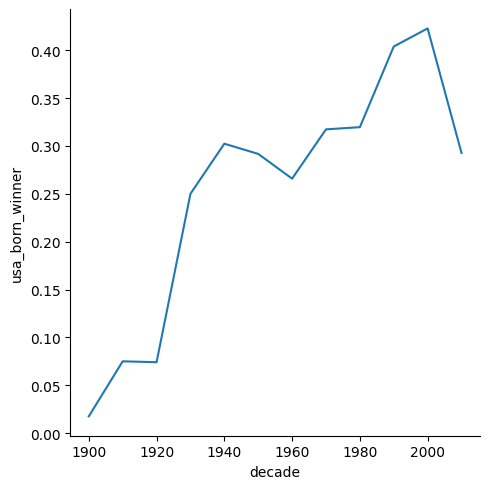

In [20]:
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]

ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line")


In [21]:
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

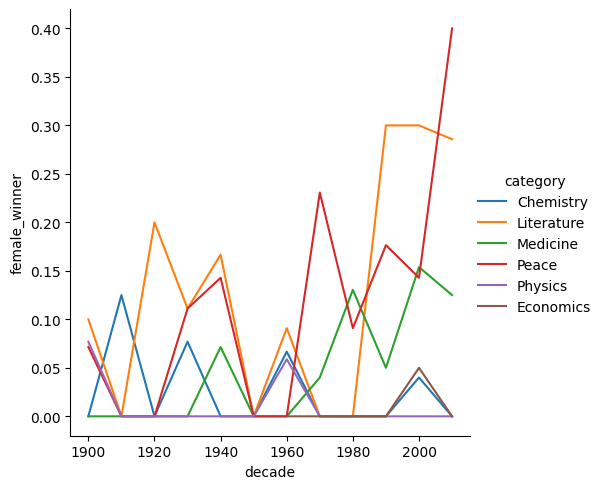

In [22]:
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")

In [23]:
nobel_women = nobel[nobel['female_winner']]
min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


In [24]:
counts = nobel['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

print("\n The repeat winners are :", repeat_list)


 The repeat winners are : ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Linus Carl Pauling', 'Frederick Sanger', 'Marie Curie, née Sklodowska']
